<h1 style='color: green; font-size: 36px; font-weight: bold;'>Beer consumption in the state of São Paulo</h1>

# <font color='black' style='font-size: 20px;'>Importing libraries and datasets</font>
<hr style='border: 2px solid black;'>

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [109]:
dados = pd.read_csv('../Dados/Consumo_cerveja.csv', sep=';')

In [110]:
dados.head()
dados.shape

(365, 7)

# <font color='black' style='font-size: 20px;'>Descriptive statistics</font>
<hr style='border: 2px solid black;'>

In [111]:
dados.describe().round()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.0,365.0,365.0,365.0,365.0,365.0
mean,21.0,17.0,27.0,5.0,0.0,25401.0
std,3.0,3.0,4.0,12.0,0.0,4399.0
min,13.0,11.0,14.0,0.0,0.0,14343.0
25%,19.0,15.0,24.0,0.0,0.0,22008.0
50%,21.0,18.0,27.0,0.0,0.0,24867.0
75%,23.0,20.0,29.0,3.0,1.0,28631.0
max,29.0,24.0,36.0,95.0,1.0,37937.0


In [112]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


# <font color='black' style='font-size: 20px;'>Analyzing possible outliers</font>
<hr style='border: 2px solid black;'>

Text(0, 0.5, 'Liters')

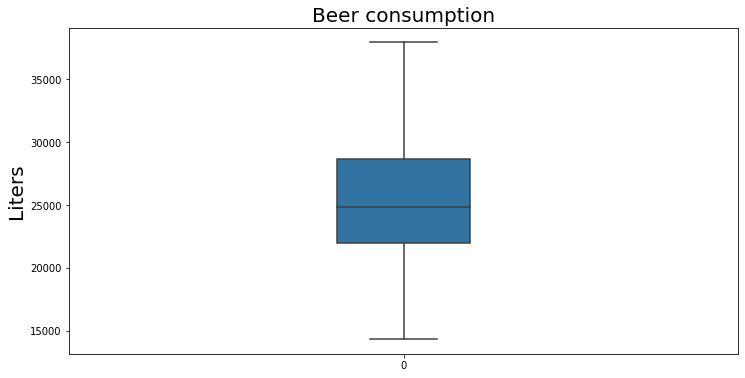

In [113]:
# Atribuir a plotagem a uma variável permite modificar ponto a ponto do gráfico em seguida
ax = sns.boxplot(data=dados['consumo'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Beer consumption', fontsize=20)
ax.set_ylabel('Liters', fontsize=20)

<AxesSubplot:title={'center':'Beer consumption'}, xlabel='Weekend', ylabel='Liters'>

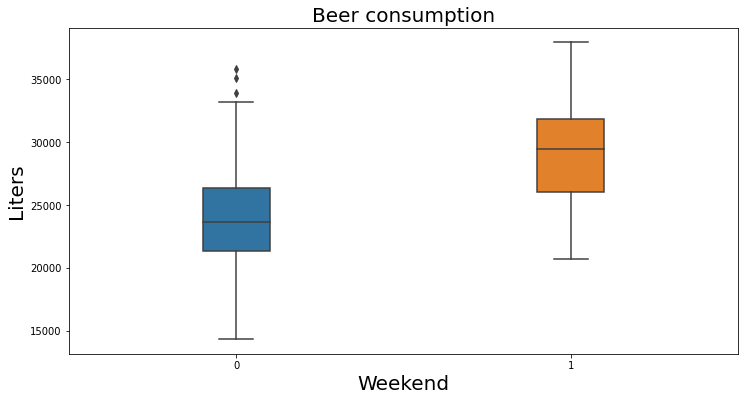

In [114]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Beer consumption', fontsize=20)
ax.set_ylabel('Liters', fontsize=20)
ax.set_xlabel('Weekend', fontsize=20)
ax

Text(0.5, 1.1, 'Scatter between variables')

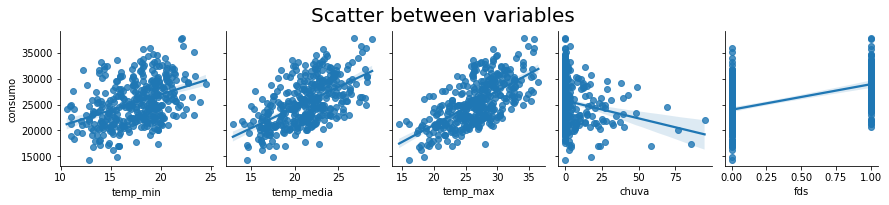

In [115]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Scatter between variables', fontsize=20, y=1.1)

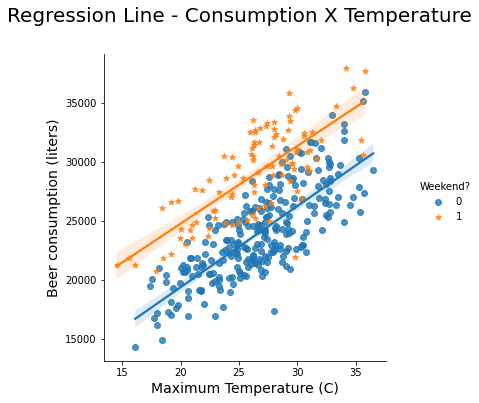

In [134]:
ax = sns.lmplot(x='temp_max', y="consumo", data=dados, hue="fds", markers=['o', '*'], legend=False)
ax.fig.suptitle('Regression Line - Consumption X Temperature', fontsize=20, y=1.1)
ax.set_axis_labels("Maximum Temperature (C)", "Beer consumption (liters)", fontsize=14)
ax.add_legend(title="Weekend?")
ax

# <font color='black' style='font-size: 20px;'>Estimating a Linear Regression Model for Consumption</font>
<hr style='border: 2px solid black;'>

In [117]:
from sklearn.model_selection import train_test_split 

In [118]:
# Series with dependent variable
y = dados['consumo']

In [119]:
# Dataframe with explanatory variables
X = dados[['temp_max', 'chuva', 'fds']]

In [120]:
#Defining training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [122]:
model = LinearRegression()

In [123]:
# Using the training and test data to estimate the model
model.fit(X_train, y_train)

LinearRegression()

In [124]:
# Obtaining the coefficient of determination to analyze the model's efficiency
print('R² = {}'.format(model.score(X_train, y_train).round(2)))

R² = 0.73


In [125]:
# Generating predictions for test data
y_previsto = model.predict(X_test)

In [126]:
# Obtaining the coefficient of determination for the predicted data
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


# <font color='black' style='font-size: 20px;'>Getting predictions for Consumption</font>
<hr style='border: 2px solid black;'>

In [127]:
inputs = X_test[0:1]
inputs

,temp_max,chuva,fds
5,30.5,12.2,0


In [128]:
model.predict(inputs)[0].round(2)

26094.9

In [129]:
# Creating a simulator
temp_max=30
chuva=5
fds=1
inputs=[[temp_max, chuva, fds]]

print('{} liters'.format(model.predict(inputs)[0].round(2)))

31591.25 liters


# <font color='black' style='font-size: 20px;'>Saving and loading models</font>
<hr style='border: 2px solid black;'>

In [130]:
import pickle

In [131]:
output = open('model_beer_consumption', 'wb')
pickle.dump(model, output)
output.close()

# <font color='black' style='font-size: 20px;'>Testing</font>
<hr style='border: 2px solid black;'>

In [132]:
import pickle

model = open('model_beer_consumption','rb')
lm_new = pickle.load(model)
model.close()

temp_max = 30
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))

25752.53 litros


# <font color='black' style='font-size: 20px;'>Interactive simulator</font>
<hr style='border: 2px solid black;'>

In [133]:
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

# Criando os controles do formulário
temp_max = widgets.Text(description="Max temp.")
chuva = widgets.RadioButtons(options=['0', '1'], description="Rain")
fds = widgets.RadioButtons(options=['0', '1'], description="Weekend")

botao = widgets.Button(description="Simular")

# Posicionando os controles
left = VBox([temp_max, chuva, fds])
inputs = HBox([left])

# Função de simulação
def simulador(sender):
    entrada=[[
                float(temp_max.value if temp_max.value else 0), 
                float(chuva.value if chuva.value else 0), 
                float(fds.value if fds.value else 0)
             ]]
    print('{0:.2f} L'.format(lm_new.predict(entrada)[0]))
    
# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador)    

In [101]:
display(inputs, botao)

Button(description='Simular', style=ButtonStyle())

31895.16 L
